# Mini Project No.1 - Linear Regression from Scratch 
## Author: Idris Benseghir  
## Date: November 2025  
## Description:
This project implements a simple linear regression model * from scratch* (without sklearn’s LinearRegression).
It demonstrates key mathematical steps such as:
- Correlation coefficient computation
- Manual calculation of slope and intercept
- Model evaluation using R², Standard Error of Estimate, Mean Absolute Error, Root Mean Squared Error
- Comparison with scikit-learn’s implementation

Dataset: study_hours.csv (Hours Studied vs Exam Score)

## Part 1 - Data Importing & Preprocessing & Target - Feature Selection 

In [1]:
# importing libraries for the whole project 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [2]:
# Step 1: Load data
data = pd.read_csv('study_hours.csv')
print("Original data:")
print(data.head())

Original data:
   hours  score
0    7.0   75.0
1    4.0   66.0
2   13.0   89.0
3   15.0   87.0
4   11.0   81.0


In [3]:
# Step 2: Check for missing values
print("Missing values if any:")
print(data.isnull().sum())

Missing values if any:
hours    5
score    6
dtype: int64


In [4]:
# Step 3: Apply imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = imputer.fit_transform(data) # dataframe is converted to an array 
data = pd.DataFrame(data_imputed, columns=data.columns) # converting the array back to the data frame 

In [5]:
# Step 4: Now check missing values again
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
hours    0
score    0
dtype: int64


Dataset Summary:
           hours      score
count  50.000000  50.000000
mean    8.800000  76.977273
std     3.946582   8.418853
min     1.000000  61.000000
25%     6.000000  72.000000
50%     8.800000  76.977273
75%    12.000000  83.000000
max    15.000000  94.000000


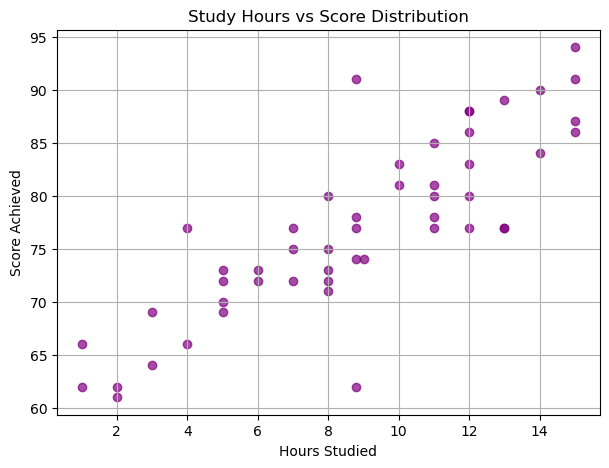

In [6]:
# Step 5: Exploratory Data Analysis (EDA)
print("Dataset Summary:")
print(data.describe())

plt.figure(figsize=(7,5))
plt.scatter(data['hours'], data['score'], color='purple', alpha=0.7)
plt.title("Study Hours vs Score Distribution")
plt.xlabel("Hours Studied")
plt.ylabel("Score Achieved")
plt.grid(True)
plt.show()

In [7]:
# Step 6: Feature-Target Selection & Correlation Analysis
# Define feature (X) and target (Y)
feature_hours = data['hours']    # Independent variable: Hours studied  
target_score = data['score']    # Dependent variable: Exam score

# Number of data points
num_samples = len(data)

# Compute sums needed for correlation coefficient
sum_x = feature_hours.sum()                  # Sum of hours
sum_y = target_score.sum()                   # Sum of scores
sum_xy = (feature_hours * target_score).sum()  # Sum of product of hours and scores
sum_x_squared = (feature_hours ** 2).sum()     # Sum of squares of hours
sum_y_squared = (target_score ** 2).sum()      # Sum of squares of scores

# Compute Pearson correlation coefficient (r)
correlation_coefficient = (num_samples * sum_xy - sum_x * sum_y) / \
                          (np.sqrt(num_samples * sum_x_squared - sum_x ** 2) *
                           np.sqrt(num_samples * sum_y_squared - sum_y ** 2))

# Display correlation coefficient
print("Correlation coefficient (r) between Hours and Score:", correlation_coefficient)
# Pre-defined correlation computation
print("Pandas correlation:", data['hours'].corr(data['score']))
# Comparison between manual calculation and Pandas method
print(f"Manual r = {correlation_coefficient:.4f}, Pandas r = {data['hours'].corr(data['score']):.4f}")

Correlation coefficient (r) between Hours and Score: 0.8397701905255038
Pandas correlation: 0.839770190525496
Manual r = 0.8398, Pandas r = 0.8398


## Part 2 - Manual Linear Regression (From Scratch)

In [8]:
# Step 1: Split Data into Training and Testing Sets
# 80% training, 20% testing
feature_train, feature_test, target_train, target_test = train_test_split(
    feature_hours, target_score, test_size=0.2, random_state=0
)
# Display number of samples
print("Number of samples:")
print(f" - Feature (hours) training set: {len(feature_train)}")
print(f" - Feature (hours) testing set:  {len(feature_test)}")
print(f" - Target (score) training set:  {len(target_train)}")
print(f" - Target (score) testing set:   {len(target_test)}")


Number of samples:
 - Feature (hours) training set: 40
 - Feature (hours) testing set:  10
 - Target (score) training set:  40
 - Target (score) testing set:   10


In [9]:
# Step 2: Compute Regression Coefficients (Model Fitting)
# Slope (b1) and Intercept (b0) calculated manually
n = len(feature_train)
# Numerator and denominator for slope (b1)
numerator_b1 = n * np.sum(feature_train * target_train) - np.sum(feature_train) * np.sum(target_train)
denominator_b1 = n * np.sum(feature_train**2) - (np.sum(feature_train))**2

slope_b1 = numerator_b1 / denominator_b1

intercept_b0 = target_train.mean() - slope_b1 * feature_train.mean()

print(f"Regression Equation: Score = {intercept_b0:.2f} + {slope_b1:.2f} * Feature(hours)")

Regression Equation: Score = 62.65 + 1.67 * Feature(hours)


In [10]:
# Step 3: Predict Target Values on Test Set
manual_target_pred = intercept_b0 + slope_b1 * feature_test

In [11]:
# Step 4: Model Evaluation 

# 4a: Coefficient of Determination (R²)
ss_res = ((target_test - manual_target_pred) ** 2).sum()        # Residual Sum of Squares 
ss_tot = ((target_test - target_test.mean()) ** 2).sum() # Total Sum of Squares 
r2_manual = 1 - (ss_res / ss_tot)

# 4b: Standard Error of Estimate (SEE)
see_manual = np.sqrt(ss_res / (len(target_test) - 2))

# 4c: Mean Absolute Error (MAE)
mae_manual = np.abs(target_test - manual_target_pred).sum() / len(manual_target_pred)

# 4d: Root Mean Squared Error (RMSE)
rmse_manual =  np.sqrt(((target_test - manual_target_pred)** 2).sum() / len(manual_target_pred))


# Print Evaluation Results
print("=== Model Performance ===")
print(f"R² (Explained Variance)     : {r2_manual:.4f}")
print(f"SEE (Standard Error of Estimate) : {see_manual:.4f}")
print(f"MAE (Mean Absolute Error)    : {mae_manual:.4f}")
print(f"RMSE (Root Mean Squared Error)   : {rmse_manual:.4f}")
print()

=== Model Performance ===
R² (Explained Variance)     : 0.6647
SEE (Standard Error of Estimate) : 6.6386
MAE (Mean Absolute Error)    : 4.3962
RMSE (Root Mean Squared Error)   : 5.9377



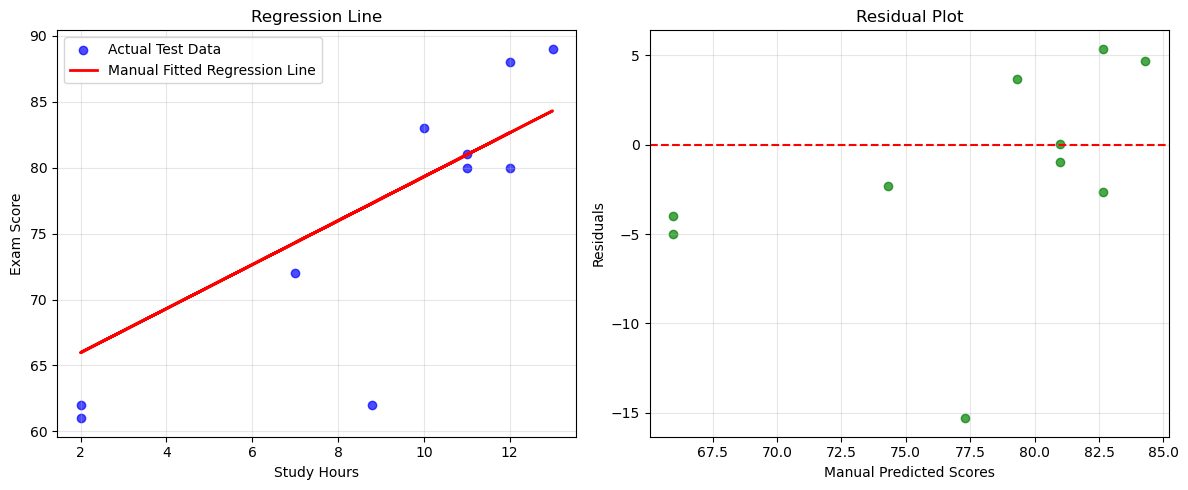

In [12]:
# Step 5: Visualize Results 
plt.figure(figsize=(12, 5))

# 5a: Regression Line  
plt.subplot(1,2,1)
plt.scatter(feature_test, target_test, color='blue', label='Actual Test Data', alpha=0.7)
plt.plot(feature_test, manual_target_pred, color='red', linewidth=2, label='Manual Fitted Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)

# 5b: Residual Plot
residuals_manual = target_test - manual_target_pred

plt.subplot(1,2,2)
plt.scatter(manual_target_pred, residuals_manual, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Manual Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 3 - Linear Regression using Scikit-learn

In [13]:
# Step 1: Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [14]:
# Step 2: Linear Regression model Fitting 
# Initialize the Linear Regression model
model = LinearRegression()

# Reshape feature arrays to 2D (required by sklearn)
feature_train_2d = feature_train.values.reshape(-1, 1)
feature_test_2d  = feature_test.values.reshape(-1, 1)

# Fit the model on training data
model.fit(feature_train_2d, target_train)

# Extract slope and the y_intercept
slope       = model.coef_[0]      # Coefficient (b1)
y_intercept = model.intercept_    # Intercept (b0)
print(f"Regression Equation: Score = {y_intercept:.2f} + {slope:.2f} * Feature(hours)")

Regression Equation: Score = 62.65 + 1.67 * Feature(hours)


In [15]:
# Step 3: Predict Target Values on Test Set
target_pred = model.predict(feature_test_2d)

In [16]:
# Step 4: Model Evaluation 

# 4a: Coefficient of Determination (R²)
r2 = r2_score(target_test , target_pred)

# 4b: Standard Error of Estimate (SEE)
see_manual = np.sqrt(ss_res / (len(target_test) - 2)) #Manual calculation (no direct sklearn function)

# 4c: Mean Absolute Error (MAE)
MAE = mean_absolute_error(target_test , target_pred)

# 4d: Root Mean Squared Error (RMSE)
RMSE= np.sqrt(mean_squared_error(target_test , target_pred))

# Print Evaluation Results
print("=== Model Performance ===")
print(f"R² (Explained Variance)     : {r2:.4f}")
print(f"SEE (Standard Error of Estimate) : {see_manual:.4f}")
print(f"MAE (Mean Absolute Error)    : {MAE:.4f}")
print(f"RMSE (Root Mean Squared Error)   : {RMSE:.4f}")
print()

=== Model Performance ===
R² (Explained Variance)     : 0.6647
SEE (Standard Error of Estimate) : 6.6386
MAE (Mean Absolute Error)    : 4.3962
RMSE (Root Mean Squared Error)   : 5.9377



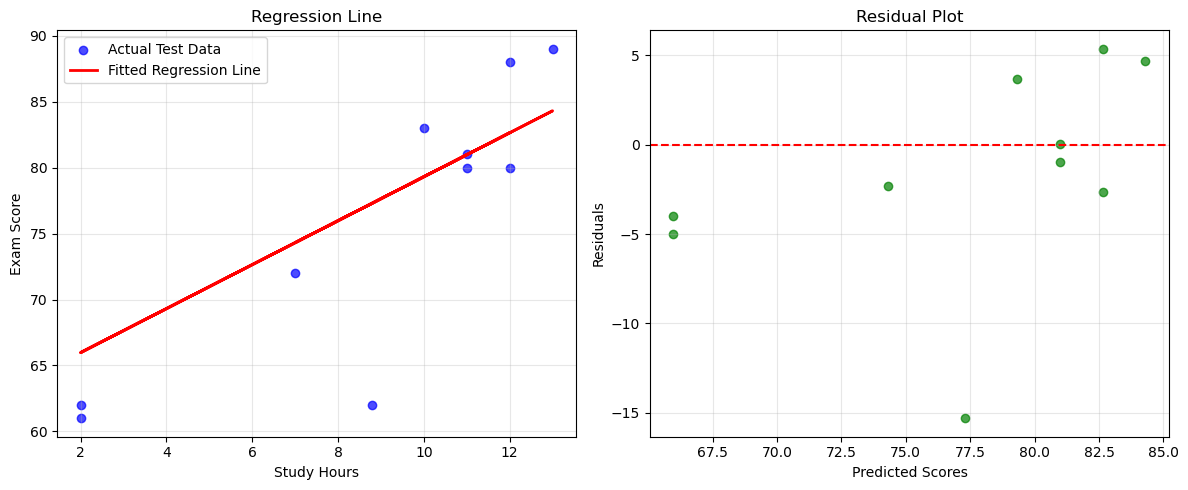

In [17]:
# Step 5: Visualize Results 
plt.figure(figsize=(12, 5))

# 5a: Regression Line 
plt.subplot(1,2,1)
plt.scatter(feature_test, target_test, color='blue', label='Actual Test Data', alpha=0.7)
plt.plot(feature_test, target_pred, color='red', linewidth=2, label='Fitted Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)

# 5b: Residual Plot
residuals_sklearn = target_test - target_pred

plt.subplot(1,2,2)
plt.scatter(target_pred, residuals_sklearn, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 4 - Results Comparison & Analysis

In [18]:
# Step 1: Compare manual(from scratch) vs sklearn(predefined)

# 1a: y_intercept & slope
print(f"Sklearn --> Regression Equation: Score = {y_intercept:.2f} + {slope:.2f} * Feature(hours)")
print(f"Manual ---> Regression Equation: Score = {intercept_b0:.2f} + {slope_b1:.2f} * Feature(hours)")

print()

# 1b: Evalation Metric( R2 , MAE , RMSE)
print(f"R² (Explained Variance)--> Sklearn: {r2:.4f}")
print(f"R² (Explained Variance)---> Manual: {r2_manual:.4f}")
print()
print(f"MAE (Mean Absolute Error)--> Sklearn: {MAE:.4f}")
print(f"MAE (Mean Absolute Error)--> Manual: {mae_manual:.4f}")
print()
print(f"RMSE (Root Mean Squared Error)--> Sklearn: {RMSE:.4f}")
print(f"RMSE (Root Mean Squared Error)--> Manual: {rmse_manual:.4f}")


Sklearn --> Regression Equation: Score = 62.65 + 1.67 * Feature(hours)
Manual ---> Regression Equation: Score = 62.65 + 1.67 * Feature(hours)

R² (Explained Variance)--> Sklearn: 0.6647
R² (Explained Variance)---> Manual: 0.6647

MAE (Mean Absolute Error)--> Sklearn: 4.3962
MAE (Mean Absolute Error)--> Manual: 4.3962

RMSE (Root Mean Squared Error)--> Sklearn: 5.9377
RMSE (Root Mean Squared Error)--> Manual: 5.9377


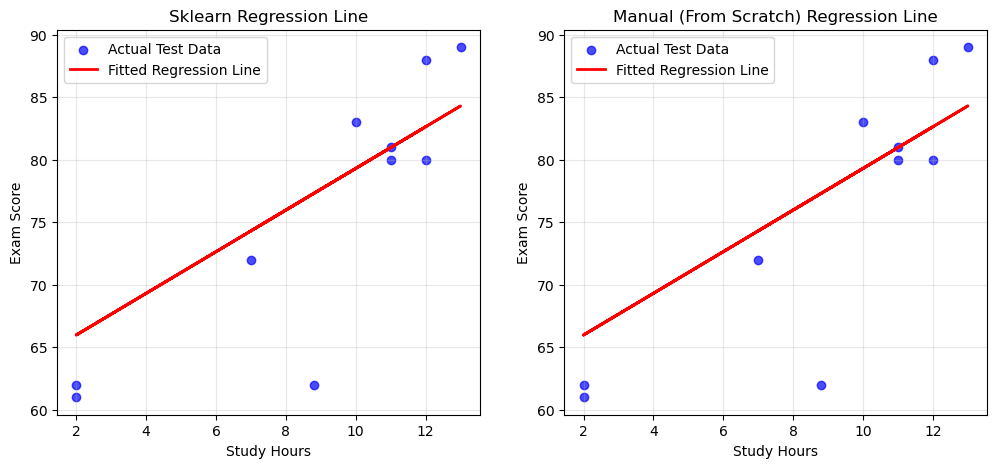

In [19]:
# Step 2: Compare manual(from scratch) vs sklearn(predefined) - Linear line Plots
plt.figure(figsize=(12, 5))

# 2a: Sklearn Linear model plot 
plt.subplot(1,2,1)
plt.scatter(feature_test, target_test, color='blue', label='Actual Test Data', alpha=0.7)
plt.plot(feature_test, target_pred, color='red', linewidth=2, label='Fitted Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Sklearn Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)

# 2b: Manual (from scratch)  Linear model plot 
plt.subplot(1,2,2)
plt.scatter(feature_test, target_test, color='blue', label='Actual Test Data', alpha=0.7)
plt.plot(feature_test, manual_target_pred, color='red', linewidth=2, label='Fitted Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Manual (From Scratch) Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)

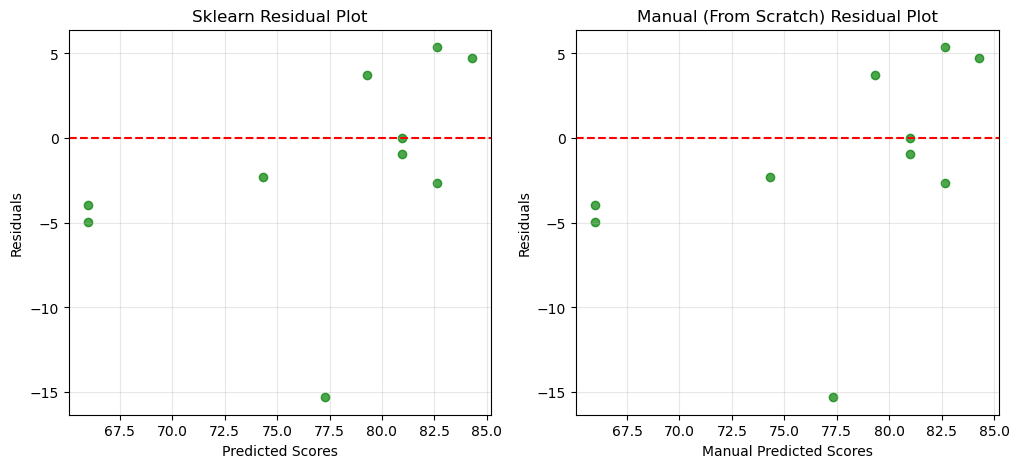

In [20]:
# Step 3: Compare manual(from scratch) vs sklearn(predefined) - Residual Plots
plt.figure(figsize=(12, 5))

# 3a: Sklearn Linear model plot 
plt.subplot(1,2,1)
plt.scatter(target_pred, residuals_sklearn, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Sklearn Residual Plot')
plt.grid(True, alpha=0.3)

# 3b: Manual (from scratch)  Linear model plot 
plt.subplot(1,2,2)
plt.scatter(manual_target_pred, residuals_manual, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Manual Predicted Scores')
plt.ylabel('Residuals')
plt.title('Manual (From Scratch) Residual Plot')
plt.grid(True, alpha=0.3)

In [21]:
# Step 4: Summary 
print("\n--- Summary ---")
if abs(r2 - r2_manual) < 0.001:
    print("Both models produce almost identical results — manual implementation matches sklearn perfectly.")
else:
    print("Minor differences observed — likely due to rounding or manual computation precision.")



--- Summary ---
Both models produce almost identical results — manual implementation matches sklearn perfectly.
